In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data and Overview

In [2]:
df = pd.read_excel('/Users/Shared/Shyam/Datasets/Phishing/Phishing Data.xlsx')
pd.set_option('max_columns', 50)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,1,0,-1,1,0,-1,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
having_IP_Address              2456 non-null int64
URL_Length                     2456 non-null int64
Shortining_Service             2456 non-null int64
having_At_Symbol               2456 non-null int64
double_slash_redirecting       2456 non-null int64
Prefix_Suffix                  2456 non-null int64
having_Sub_Domain              2456 non-null int64
SSLfinal_State                 2456 non-null int64
Domain_registeration_length    2456 non-null int64
Favicon                        2456 non-null int64
port                           2456 non-null int64
HTTPS_token                    2456 non-null int64
Request_URL                    2456 non-null int64
URL_of_Anchor                  2456 non-null int64
Links_in_tags                  2456 non-null int64
SFH                            2456 non-null int64
Submitting_to_email            2456 non-null int64
Abnormal_URL              

### Check for missing values

In [4]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Distribution of target variable

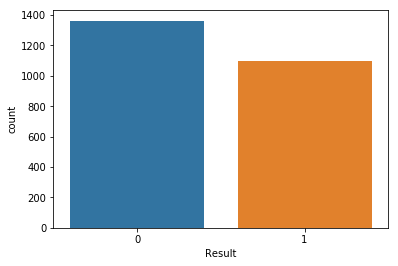

In [5]:
sns.countplot(df['Result'])

### Baseline Models

In [6]:
#Splitting data

from sklearn.model_selection import train_test_split

X = df.drop('Result', axis = 1)
y= df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, stratify = y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


classifiers = {'Decision Tree' : DecisionTreeClassifier(random_state = 42),
               'SVM' : SVC(), 
               'Logistic Regression' : LogisticRegression(), 
               'Random Forests' : RandomForestClassifier(random_state = 42)}

for key, val in classifiers.items(): #Looping over classifiers and displaying scores
        val.fit(X_train , y_train)
        prediction = val.predict(X_test)
        score = cross_val_score(val , X , y , cv = 3 , scoring = 'accuracy').mean()
        print('\n' , key , '\n')
        print('Classification Report:\n' , metrics.classification_report(y_test , prediction))
        print('\nConfusion Matrix:\n' , metrics.confusion_matrix(y_test , prediction))
        print('\nCross Validation Score: ' , score)


 Decision Tree 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       409
           1       0.95      0.93      0.94       328

    accuracy                           0.95       737
   macro avg       0.95      0.94      0.94       737
weighted avg       0.95      0.95      0.95       737


Confusion Matrix:
 [[392  17]
 [ 23 305]]

Cross Validation Score:  0.9686455444401654

 SVM 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       409
           1       0.94      0.94      0.94       328

    accuracy                           0.95       737
   macro avg       0.95      0.94      0.95       737
weighted avg       0.95      0.95      0.95       737


Confusion Matrix:
 [[390  19]
 [ 21 307]]

Cross Validation Score:  0.9580590558585668

 Logistic Regression 

Classification Report:
               precision    recall  f1-score   su

### Hyperparameter Optimization of best model (Random Forests)

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100, 600], 'max_features': ['sqrt', 'log2'], 
               'criterion' :['gini', 'entropy']}


grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print('Best Score: ', grid_search.best_score_)
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.9703335819377585
Best Parameters:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 600}


### Retraining model with optimized parameters

In [9]:
final_model = RandomForestClassifier(random_state = 42, criterion = 'entropy', max_features = 'log2',
                                     n_estimators = 600)
final_model.fit(X_train , y_train)
prediction = final_model.predict(X_test)
score = cross_val_score(final_model , X , y , cv = 3 , scoring = 'accuracy').mean()
print('Classification Report:\n' , metrics.classification_report(y_test , prediction))
print('\nConfusion Matrix:\n' , metrics.confusion_matrix(y_test , prediction))
print('\nCross Validation Score: ' , score)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       409
           1       0.96      0.97      0.96       328

    accuracy                           0.97       737
   macro avg       0.97      0.97      0.97       737
weighted avg       0.97      0.97      0.97       737


Confusion Matrix:
 [[396  13]
 [ 11 317]]

Cross Validation Score:  0.9804510440207261


### Plotting important features for Random Forest

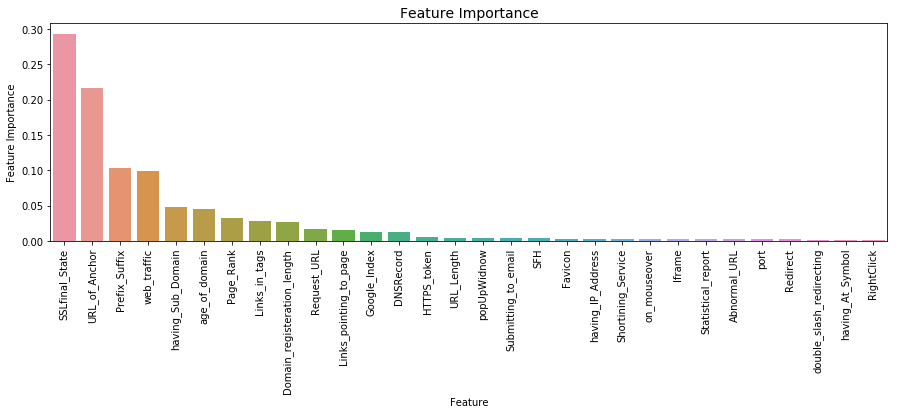

In [10]:
features = X.columns
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
tmp = pd.DataFrame({'Feature' : features , 'Feature Importance' : rf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance' , ascending = False)
plt.figure(figsize = (15 , 4))
plt.title('Feature Importance' , fontsize = 14)
s = sns.barplot(x = 'Feature' , y = 'Feature Importance' , data = tmp)
s.set_xticklabels(s.get_xticklabels() , rotation = 90)
plt.show()  